In [ ]:
import numpy as np

In [ ]:
inputs = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y = np.array([[0],[1],[1],[0]])

In [ ]:
class NeuronaXOR():
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W1 = np.array([[0.2, 0.3, -0.4],
                            [0.4, -0.1, 0.2],
                            [-0.3, 0.2, 0.1]])

        self.W2 = np.array([[0.3],
                            [-0.1],
                            [0.2]])

    def forward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        self.output = self.sigmoid(self.z2)
        return self.output

    def backprop(self, X, y, lr):
        output = self.forward(X)
        error_out = output - y
        delta_out = error_out * self.sigmoid_der(output)
        derivative_W2 = np.dot(self.a1.T, delta_out)
        error_hidden = np.dot(delta_out, self.W2.T)
        delta_hidden = error_hidden * self.sigmoid_der(self.a1)
        derivative_W1 = np.dot(X.T, delta_hidden)
        # gradient descent
        self.W2 -= derivative_W2 * lr
        self.W1 -= derivative_W1 * lr
        return self.mse(output, y)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_der(self, x):
        return x * (1 - x)

    def mse(self, output, target):
        return np.mean((output - target) ** 2) / 2




1.   1/2 (output - y) ^ 2
2.   1/2 (sigm(z2) - y) ^ 2
3.   1/2 (sigm(a1W2) - y) ^ 2
4.   1/2 (sigm(sigm(z1)W2) - y) ^ 2
5.    1/2 (sigm(sigm(inputsW1)W2) - y) ^ 2
* Derivadas
6.   (output - y) * sigm'(z2)* a1
7.   (output - y) * sigm'(z2) * W2 * sigm'(z1) * inputs



In [ ]:
nuevo = NeuronaXOR(3, 3, 1)
print("Antes:")
print(nuevo.forward(inputs))

errores = []
error = 1
while error > 0.001:
  error = nuevo.backprop(inputs, y, 0.3)
  errores.append(error)
print("Después:")
print(nuevo.forward(inputs))

x_axis = range(0, len(errores))


Antes:
[[0.54430343]
 [0.55475067]
 [0.54124899]
 [0.55168179]]
Después:
[[0.01404911]
 [0.95272097]
 [0.95177778]
 [0.05690845]]


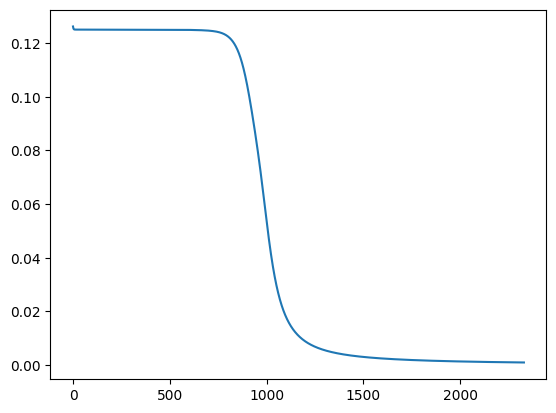

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_axis, errores)
plt.show()